
# Deliveries Dataset - EDA Notebook

This notebook covers:
1. Import Libraries  
2. Load Dataset  
3. Explore Data  
4. Data Cleaning  
5. Analysis with NumPy & Pandas  
6. Visualization with Matplotlib  
7. Visualization with Seaborn


In [1]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display
pd.set_option('display.max_columns', None)
%matplotlib inline


In [2]:

# 2. Load Dataset
df = pd.read_csv("deliveries.csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:

# 3. Explore Data
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nBasic Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:")
df.describe(include='all').T


Shape of dataset: (150460, 21)

Column names:
 ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind', 'fielder']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     1

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
match_id,150460.0,NaN,NaN,NaN,318.281317,182.955531,1.0,161.0,319.0,476.0,636.0
inning,150460.0,NaN,NaN,NaN,1.482188,0.501768,1.0,1.0,1.0,2.0,4.0
batting_team,150460,14,Mumbai Indians,18943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowling_team,150460,14,Mumbai Indians,18879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over,150460.0,NaN,NaN,NaN,10.142649,5.674338,1.0,5.0,10.0,15.0,20.0
ball,150460.0,NaN,NaN,NaN,3.616483,1.807698,1.0,2.0,4.0,5.0,9.0
batsman,150460,461,V Kohli,3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_striker,150460,458,G Gambhir,3635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowler,150460,356,Harbhajan Singh,2989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_super_over,150460.0,NaN,NaN,NaN,0.000538,0.023196,0.0,0.0,0.0,0.0,1.0


In [4]:

# 4. Data Cleaning

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert columns if applicable
if 'over' in df.columns and 'ball' in df.columns:
    df['delivery_number'] = (df['over'] * 6) + df['ball']

# Confirm cleaning
print("Missing values after cleaning:\n", df.isnull().sum())
df.head()


C:\Users\keert\AppData\Local\Temp\ipykernel_30288\2154584626.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Missing values after cleaning:
 match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
delivery_number     0
dtype: int64


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,delivery_number
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,SK Raina,caught,KD Karthik,7
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,SK Raina,caught,KD Karthik,8
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,SK Raina,caught,KD Karthik,9
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,SK Raina,caught,KD Karthik,10
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,SK Raina,caught,KD Karthik,11


In [5]:

# 5. Analysis with NumPy & Pandas

# Total runs scored
total_runs = np.sum(df['total_runs']) if 'total_runs' in df.columns else 0
print("Total Runs Scored in Dataset:", total_runs)

# Average runs per delivery
avg_runs = np.mean(df['total_runs']) if 'total_runs' in df.columns else 0
print("Average Runs per Delivery:", round(avg_runs, 2))

# Top 5 batsmen
if 'batsman' in df.columns and 'batsman_runs' in df.columns:
    top_batsmen = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 Batsmen:\n", top_batsmen)

# Top 5 bowlers
if 'bowler' in df.columns and 'player_dismissed' in df.columns:
    top_bowlers = df[df['player_dismissed'].notnull()]['bowler'].value_counts().head(5)
    print("\nTop 5 Bowlers by Wickets:\n", top_bowlers)


Total Runs Scored in Dataset: 194313
Average Runs per Delivery: 1.29

Top 5 Batsmen:
 batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

Top 5 Bowlers by Wickets:
 bowler
Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
Name: count, dtype: int64


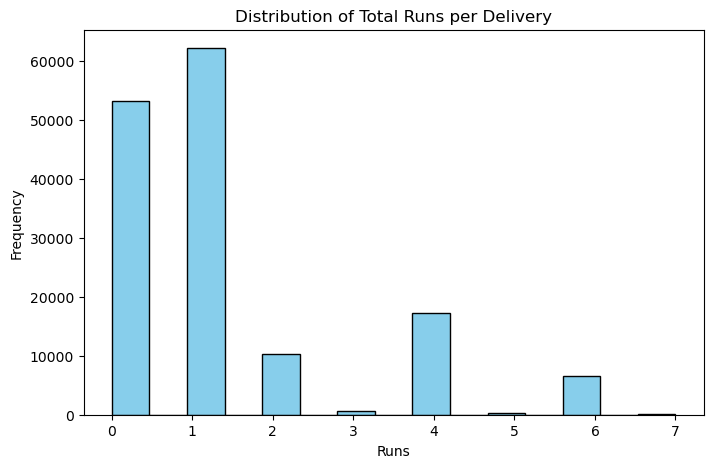

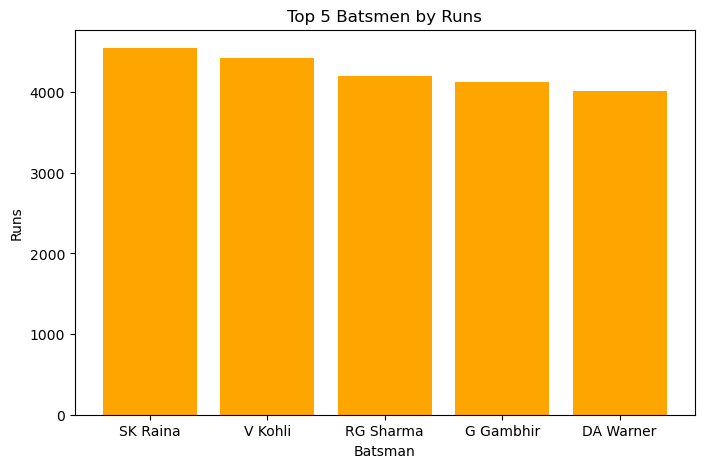

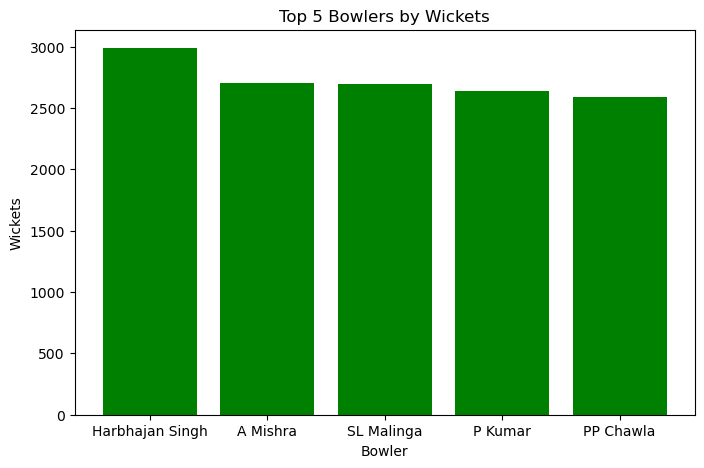

In [6]:

# 6. Visualization with Matplotlib

# Histogram of total runs
if 'total_runs' in df.columns:
    plt.figure(figsize=(8,5))
    plt.hist(df['total_runs'], bins=15, color='skyblue', edgecolor='black')
    plt.title("Distribution of Total Runs per Delivery")
    plt.xlabel("Runs")
    plt.ylabel("Frequency")
    plt.show()

# Top batsmen bar chart
if 'batsman' in df.columns and 'batsman_runs' in df.columns:
    plt.figure(figsize=(8,5))
    plt.bar(top_batsmen.index, top_batsmen.values, color='orange')
    plt.title("Top 5 Batsmen by Runs")
    plt.xlabel("Batsman")
    plt.ylabel("Runs")
    plt.show()

# Top bowlers bar chart
if 'bowler' in df.columns and 'player_dismissed' in df.columns:
    plt.figure(figsize=(8,5))
    plt.bar(top_bowlers.index, top_bowlers.values, color='green')
    plt.title("Top 5 Bowlers by Wickets")
    plt.xlabel("Bowler")
    plt.ylabel("Wickets")
    plt.show()


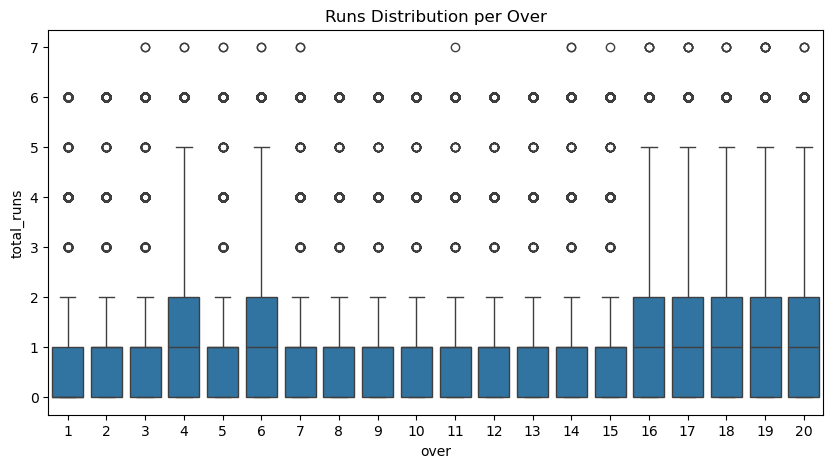

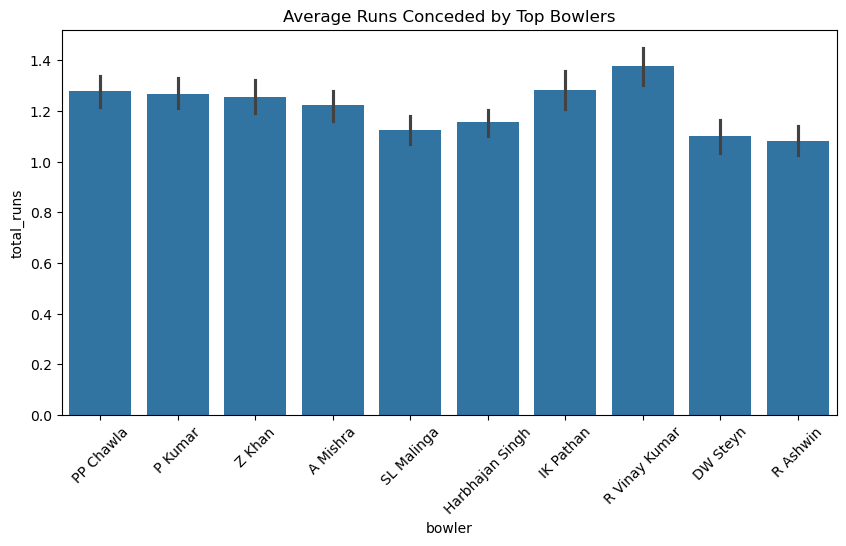

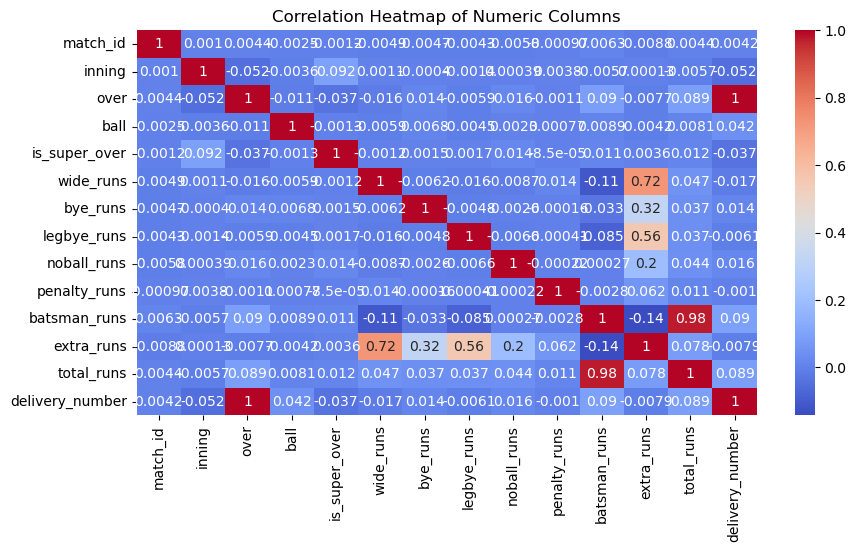

In [7]:

# 7. Visualization with Seaborn

# Runs per over
if 'over' in df.columns and 'total_runs' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='over', y='total_runs', data=df)
    plt.title("Runs Distribution per Over")
    plt.show()

# Scatterplot for bowler vs runs conceded
if 'bowler' in df.columns and 'total_runs' in df.columns:
    top_bowlers_for_viz = df['bowler'].value_counts().head(10).index
    plt.figure(figsize=(10,5))
    sns.barplot(x='bowler', y='total_runs', data=df[df['bowler'].isin(top_bowlers_for_viz)], estimator=np.mean)
    plt.title("Average Runs Conceded by Top Bowlers")
    plt.xticks(rotation=45)
    plt.show()

# Heatmap for numeric correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()
